In [3]:
# 패션 MNIST 데이터셋을 적재하고 훈련 세트와 검증 세트로 나눔
from tensorflow import keras
from sklearn.model_selection import train_test_split
(train_input, train_target), (test_input, test_target) =\
    keras.datasets.fashion_mnist.load_data()
train_scaled = train_input / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(
train_scaled, train_target, test_size=0.2, random_state=42)

In [6]:
# model 생성
def model_fn(a_layer = None):
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=(28, 28)))
    model.add(keras.layers.Dense(100, activation='relu'))
    if a_layer:
        model.add(a_layer)
    model.add(keras.layers.Dense(10, activation='softmax'))
    return model

In [7]:
model = model_fn()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [10]:
# 모댈을 훈련하지만 fit () 메서드의 결괴를 history 변수에 담음
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=5, verbose=0)

In [11]:
# history 객체에는 훈련 측정값이 담겨 있는 history 댁셔너리가 들어 있습니다, 손실 & 정확도가 들어감
print(history.history.keys())

dict_keys(['loss', 'accuracy'])


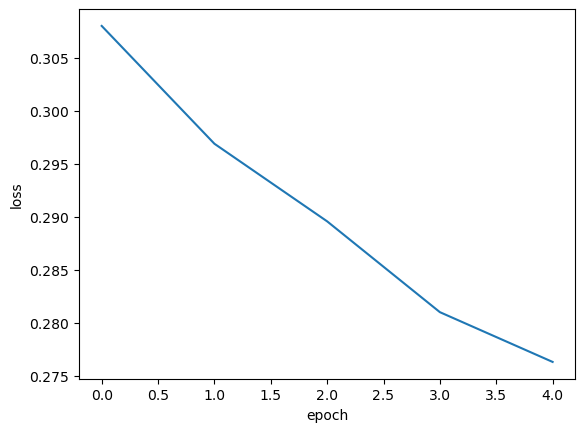

In [12]:
# 그래프화
# history 객체에는 훈련 측정값이 담겨 있는 history 댁셔너리가 들어 있습니다
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

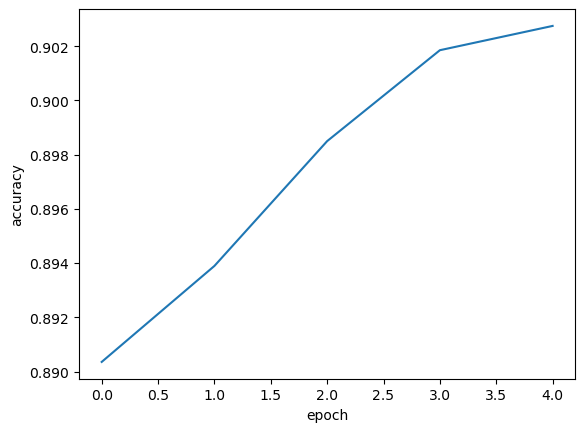

In [13]:
# 정확도 출력
# 확실히 에포크마다 손실이 감소하고 정확도가 향상.
# 그렇다면 에포크를 늘려서 더 훈련해 봐야 하지 않을까요? 계속 손실이 감소하니까요!
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

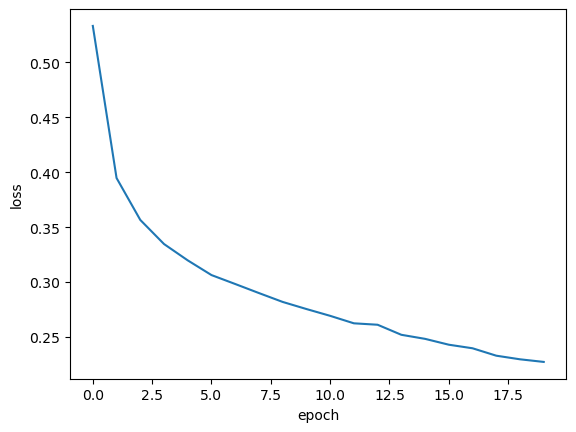

In [15]:
# epoch = 20,손실이 잘 감소합니다. 이전보다 더 나은 모댈을 훈련한 것?
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0)
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

### 검증 손실

In [18]:
# 모댈을 훈련하지만 fit () 메서드의 결괴를 history 변수에 담음
# validation_data 매개변수에 검증에 시용할 입력과 타깃값을 튜플로 만들어 전달합 니다.
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
                    validation_data=(val_scaled, val_target))

In [20]:
# 검증 세트에 대한 손실은 ‘val_loss’에 들어 있고 정확도는 ‘val_accuracy’에 들어 있겠네요
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


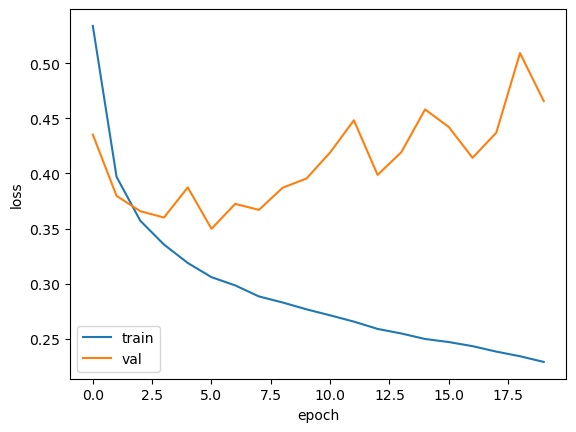

In [21]:
# 과대/과소적합 문제를 조사하기 위해 훈련 손실과 검증 손실을 한 그래프에 그려서 비교해 보겠습니다.
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

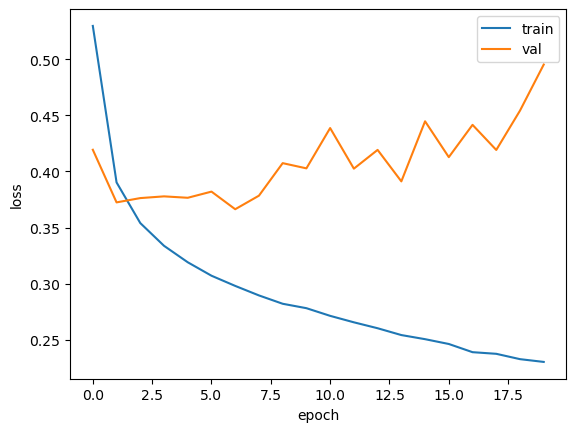

In [22]:
# RMSprop 옵티마이저는 많은 문제에서 잘 동작합니다.
# 만약 이 옵티마이저 대신 다른 옴티마 이저를 테스트해 본다면 Adam이 좋은 선택입니다.
# Adam은 적응적 학습률을 사용하기 때문에 에포크가 진행되면서 학습률의 크기를 조정할 수 있습니다.
# Adam 옵티마이저를 적용해 보고 훈련 손 실과 검증 손실을 다시 그려 보죠. -> 과대적합이 휠씬 줄어서 전반적인 감소 추세가 이어짐
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
                    validation_data=(val_scaled, val_target))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

### Dropout

In [23]:
# 정의한 model_fn() 함수에 드롭이웃 객체를 전달하여 층을 추가해 보겠습니다.
# 여기에 서는 30% 정도를 드롭아웃 합니다. 만들어진 모댈의 summarγ() 메서드를 사용해 드롭이웃 층이 잘 추가되었는지 확인
model = model_fn(keras.layers.Dropout(0.3))
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_10 (Dense)            (None, 100)               78500     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_11 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


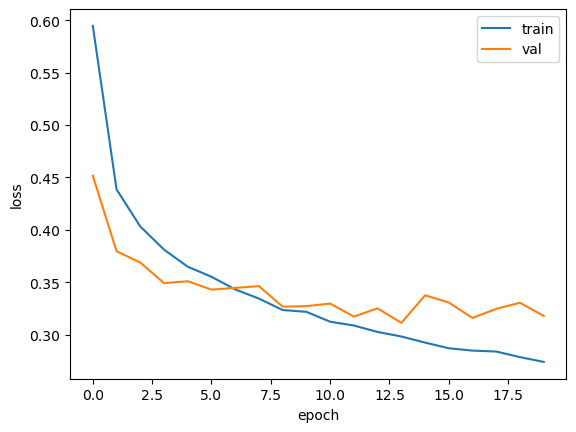

In [24]:
# 훈련손실 과 검증손실의 그래프를 그려 비교
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
                    validation_data=(val_scaled, val_target))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

### 모델 저장과 복원

In [25]:
# 에포크 횟수를 10으로 다시 지정하고 모델을 훈련
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=10, verbose=0,
                    validation_data=(val_scaled, val_target))

In [26]:
# 모댈 구조와 모댈 파라미터를 함께 저장하는 save() 메서드도 제공
model.save_weights('model-weights.h5')

In [27]:
model.save('model-whole.h5')

/Users/daehyunkim/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [28]:
# 파일 확인
!ls -al *.h5

-rw-r--r--  1 daehyunkim  staff  333320 Nov 21 00:36 model-weights.h5
-rw-r--r--  1 daehyunkim  staff  982480 Nov 21 00:36 model-whole.h5


In [29]:
# 첫 번째는 훈련을 하지 않은 새로운 모댈을 만들고 model-weights.h5 파일에서 훈련된 모델 파라미터를 읽어서 사용합니다.
# 두 번째는 아예 model-whole.h5 파일에서 새로운 모델을 만들어 바로 사용합니다. 먼저 첫 번째 실험부터 시작.

model = model_fn(keras.layers.Dropout(0.3))
model.load_weights('model-weights.h5')

In [30]:
# 모댈의 predict() 메서드 결과에서 가장큰값을고르기 위해 념파이 argmax() 함수를 사용.
# 이 함수는 배열에서 가장 큰 값의 인텍스를 반환
import numpy as np
val_labels = np.argmax(model.predict(val_scaled), axis=-1)
print(np.mean(val_labels == val_target))

375/375 [==============================] - 0s 302us/step
0.8785833333333334


In [32]:
# 모델 전체를 파일에서 읽은 다음 검증 세트의 정확도를 출력
model = keras.models.load_model('model-whole.h5')
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 0s 297us/step - loss: 0.3274 - accuracy: 0.8786


[0.32738712430000305, 0.8785833120346069]

### Callback

In [33]:
# 훈련 과정 중간에 어떤 작업을 수행할 수 있게 하는 객체로 keras.callbacks 패키지 아 래에 있는 클래스들입니다.
# fit() 메서드의 callbacks 매개변수에 리스트로 전달하여 시용합니다.
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5', save_best_only=True)
model.fit(train_scaled, train_target, epochs=10, verbose=0,
                    validation_data=(val_scaled, val_target),callbacks=[checkpoint_cb])

In [34]:
model = keras.models.load_model('best-model.h5')
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 0s 313us/step - loss: 0.3261 - accuracy: 0.8842


[0.32614922523498535, 0.8841666579246521]

케라스에는 조기 종료를 위한 EarlyStopping 콜백을 제공합니다. 이 콜백의 patience 매개변수 는 검증 점수가 향상되지 않더라도 참을 에포크 횟수로 지정합니다. 예를 들어 다음 코드에서처럼 patience=2로 지정하면 2번 연속 검증 점수가 향상되지 않으면 훈련을 중지합니다. 또한 restore_ best_weights 매개변수를 True로지정하면가장낮은검증손실을낸모댈파라미터로되돌립니다.
EarlyStopping 콜백을 ModelCheckpoint 콜백과 함께 사용하면 가장 낮은 검증 손실의 모델을 파일에 저장하고 검증 손실이 다시 상승할 때 훈련을 중지할 수 있습니다. 또한 훈련을 중지한 다음 현재 모델의 파라미터를 최상의 파라미터로 되돌립니다.

In [37]:
model = model_fn(keras.layers.Dropout(0.3))

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics='accuracy')

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)

history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
                    validation_data=(val_scaled, val_target),callbacks=[checkpoint_cb, early_stopping_cb])

In [38]:
print(early_stopping_cb.stopped_epoch)

9


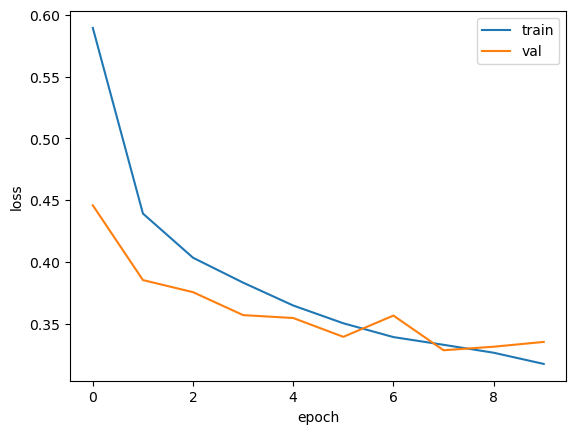

In [39]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [41]:
# 검증 세트에 대한 성능을 확인
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 0s 312us/step - loss: 0.3287 - accuracy: 0.8809


[0.32871943712234497, 0.8809166550636292]